**Please don't put any answers in markdown cells.**

Grading is a hair easier when I know that your stuff is only in code cells and my stuff is only in markdown cells.  Sorry about any annoyances from having to type some responses as comments.

0. Load all libraries needed for your code in the cell below.  Before you turn it in, make sure you aren't `import`ing anything that your code doesn't need.

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 999

1. Read the data found at `data_url` into a `pandas` dataframe.

In [176]:
data_url = "http://ballings.co/hidden/aCRM/data/chapter2/subscriptions.txt"
subs = pd.read_table(data_url, delimiter=";")

2. Show the `shape` and `head` of the data.

> The below line of code is nice to know about (see [docs](https://pandas.pydata.org/docs/user_guide/options.html) for more).
> 
> ```py
> pd.options.display.max_columns = 999
> ```

In [177]:
print(subs.shape)
subs.head()

(227, 21)


,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
0,1000024,1150045,8,1111110,18/01/2010,17/04/2010,76,25,17/03/2010,BT,Paid,27/01/2010,8552,79.0000,79.0,1.039474,0.0,0.0000,0.0000,79.0,0.0
1,1000082,1150046,8,1111110,14/01/2010,12/03/2010,50,25,03/03/2010,BT,Paid,11/02/2010,10017,51.9737,29.6,0.592000,0.0,22.3737,22.3737,29.6,0.0
2,100012,89085,8,1111110,01/01/2008,30/12/2008,304,10,21/11/2008,BT,Paid,12/12/2007,875,249.0000,249.0,0.811842,0.0,0.0000,0.0000,246.8,-2.2
3,100013,89085,8,1111110,02/01/2007,31/12/2007,304,25,01/12/2007,BT,Paid,28/12/2006,874,235.0000,235.0,0.773026,0.0,0.0000,0.0000,235.0,0.0
4,100016,89087,8,1111110,01/01/2008,30/12/2008,304,10,21/11/2008,BT,Paid,12/12/2007,875,249.0000,249.0,0.811842,0.0,0.0000,0.0000,246.8,-2.2


3. Ensure the `Pattern` variable is clean!

> The data is for newspaper subscriptions.  `Pattern` indicates what days of the week we deliver to the customer;  it should be 7 digits.  Your data read likely converted the column to `int` which loses some of the digits.  Please fix.
>
> There should be seven digits in the `Pattern` to indicate each day of the week. The week starts on Monday. eg: `1000000` indicates delivery only on monday; eg: `0000001` indicates delivery only on sunday; eg: `1111111` indicates delivery on all days.

In [178]:
subs["Pattern"] = subs["Pattern"].astype(str)
subs["Pattern"] = subs["Pattern"].str.zfill(7)

4. What are the most popular `Patterns`? Show a table or graphic to

In [179]:
subs["Pattern"].value_counts()

Pattern
1111110    217
0000010      9
0000110      1
Name: count, dtype: int64

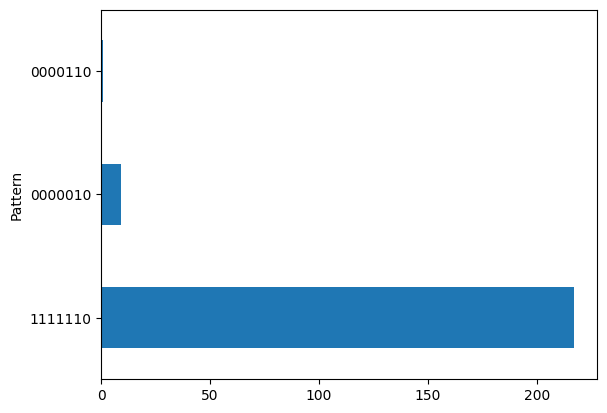

In [180]:
subs["Pattern"].value_counts().plot.barh()
plt.show()

5. How many records contain NAs in this data?

In [181]:
subs.isna().any(axis=1).sum()

49

6. Which columns have the most NAs?

In [182]:
na_counts = subs.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]

RenewalDate          49
PaymentDate          12
TotalCredit          10
TotalPrice           10
TotalDiscount        10
FormulaDiscount      10
ProductDiscount      10
NetNewspaperPrice    10
NetFormulaPrice      10
GrossFormulaPrice    10
dtype: int64

7. Create a subset of your data that shows the rows that contain any NAs; display just the `head()` of these records.

In [183]:
na_records = subs[subs.isna().any(axis=1)]
print(na_records.shape)
na_records.head()

(49, 21)


,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
9,1000566,309653,2,1111110,13/02/2010,13/02/2010,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1000774,110573,8,1111110,13/02/2010,15/05/2010,76,10,NaN,BT,Paid,27/01/2010,8552,79.000000,79.0,1.039474,0.0,0.000000,0.000000,79.0,0.0
17,1000848,892534,5,1111110,13/02/2010,12/04/2011,354,10,NaN,BT,Paid,22/02/2010,9690,310.914306,267.0,0.754237,0.0,43.914306,43.914306,267.0,0.0
19,1001214,246132,8,1111110,16/01/2010,16/01/2010,152,25,NaN,BT,Not Paid,NaN,9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,100131,89154,8,1111110,08/05/2006,07/05/2007,303,15,NaN,BT,Paid,25/04/2006,873,229.000000,229.0,0.755776,0.0,0.000000,0.000000,229.0,0.0


8. Choose one of the columns that contains NAs and hypothesize what a missing value could mean in this context.

> * Is it worrisome, just random data issues, or is there some pattern/context you think could explain them?
> * Would we want to drop these records before doing any analysis? (add nuance as you'd like)

*Big ole hint: there is a pattern of missingness for the records with TotalPrice NA*

In [184]:
# Any code here:
subs[subs["PaymentStatus"] == "Not Paid"]
# (make sure it doesn't make a huge wall of output to scroll by)

,SubscriptionID,CustomerID,ProductID,Pattern,StartDate,EndDate,NbrNewspapers,NbrStart,RenewalDate,PaymentType,PaymentStatus,PaymentDate,FormulaID,GrossFormulaPrice,NetFormulaPrice,NetNewspaperPrice,ProductDiscount,FormulaDiscount,TotalDiscount,TotalPrice,TotalCredit
9,1000566,309653,2,1111110,13/02/2010,13/02/2010,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1001214,246132,8,1111110,16/01/2010,16/01/2010,152,25,NaN,BT,Not Paid,NaN,9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1003649,951565,8,1111110,18/02/2010,18/02/2010,152,10,NaN,BT,Not Paid,NaN,9104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,1003776,25909,6,1111110,18/02/2010,18/02/2010,76,10,NaN,BT,Not Paid,NaN,8644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,1007193,642513,7,1111110,13/02/2010,13/02/2010,152,10,NaN,BT,Not Paid,NaN,8789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1008646,770532,6,1111110,24/02/2010,24/02/2010,152,10,NaN,BT,Not Paid,NaN,8955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,1009148,135581,8,1111110,25/02/2010,25/02/2010,76,10,NaN,BT,Not Paid,NaN,9142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,1009992,791847,6,1111110,26/02/2010,26/02/2010,304,10,NaN,BT,Not Paid,NaN,8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,1010151,1120343,8,0000010,30/01/2010,06/02/2010,52,4,NaN,BT,Not Paid,NaN,9492,57.2,45.0,0.865385,0.0,12.2,12.2,0.0,0.0
176,1010643,968445,8,0000110,27/02/2010,15/05/2010,104,8,NaN,BT,Not Paid,NaN,1505,57.2,57.2,1.100000,0.0,0.0,0.0,0.0,0.0


In [185]:
# Written answer here:
#
# "Not Paid" `PaymentStatus` doesn't have any other payment info because
# customer hasn't paid. Depending on the analysis we'd drop these records
# or use some type of indicator value in place of NAs as needed.

9. `str_subset` and `list_subset` are created for you below. Investigate the difference in how they each display, their `.head`'s, and their `.shape`s.

In [186]:
str_subset = subs["TotalPrice"].head(3)
list_subset = subs[["TotalPrice"]].head(3)

In [187]:
print(str_subset.shape)
print(type(str_subset))
str_subset

(3,)
<class 'pandas.core.series.Series'>


0     79.0
1     29.6
2    246.8
Name: TotalPrice, dtype: float64

In [188]:
print(list_subset.shape)
print(type(list_subset))
list_subset

(3, 1)
<class 'pandas.core.frame.DataFrame'>


,TotalPrice
0,79.0
1,29.6
2,246.8


10. Make a variable showing how long a customer has been with us in days.  I'll refer to this variable as "`CustomerLifetimeDays`" in future prompts.

> *Make sure you don't ignore any warnings; read them and act on them as needed.*

In [189]:
id_counts = subs["CustomerID"].value_counts()
dups = id_counts[id_counts > 1]
dups.head(3)

CustomerID
89898    5
89989    3
89154    3
Name: count, dtype: int64

There are duplicate customer IDs. I believe this would be more of a business decision than a technical one on how to handle.  The goal of the analysis might call for total days ever, most recent contiguous streak, or other potential features.

A further complexity that I won't address is overlapping dates.  `246132` will have 170 days double counted in my method.

No one with multiple records ever changed products or patterns.

In [190]:
subs["EndDate"] = pd.to_datetime(subs["EndDate"], dayfirst=True)
subs["StartDate"] = pd.to_datetime(subs["StartDate"], dayfirst=True)

subs["SubscriptionLengthDays"] = subs["EndDate"] - subs["StartDate"]
subs["SubscriptionLengthDays"] = subs["SubscriptionLengthDays"].dt.days

In [191]:
dup_records = subs[subs["CustomerID"].isin(dups.index)]
dup_records = dup_records.sort_values(["CustomerID", "StartDate"])

dup_records["PrevStartDate"] = dup_records.groupby("CustomerID")["StartDate"].shift()
dup_records["PrevEndDate"] = dup_records.groupby("CustomerID")["EndDate"].shift()
dup_records["PrevProductID"] = dup_records.groupby("CustomerID")["ProductID"].shift()
dup_records["PrevPattern"] = dup_records.groupby("CustomerID")["Pattern"].shift()

dup_records["GapInSubscription"] = dup_records["StartDate"] - dup_records["PrevEndDate"]
dup_records["GapInSubscription"] = dup_records["GapInSubscription"].dt.days

display_df = dup_records[~dup_records["GapInSubscription"].isna()].copy()

display_df["ChangedProduct"] = display_df["PrevProductID"] != display_df["ProductID"]
display_df["ChangedPattern"] = display_df["PrevPattern"] != display_df["Pattern"]
display_df["GapInSubscription"] = display_df["GapInSubscription"].astype("Int64")

display_cols = [
    "CustomerID",
    "GapInSubscription",
    "StartDate",
    "EndDate",
    "PrevStartDate",
    "PrevEndDate",
    "ChangedProduct",
    "ChangedPattern",
]
display = display_df[display_cols].sort_values("CustomerID", ascending=False)
display.style.background_gradient(subset=["GapInSubscription"])

,CustomerID,GapInSubscription,StartDate,EndDate,PrevStartDate,PrevEndDate,ChangedProduct,ChangedPattern
169,951565,0,2010-02-18 00:00:00,2011-03-18 00:00:00,2010-02-18 00:00:00,2010-02-18 00:00:00,False,False
106,309653,0,2010-02-13 00:00:00,2011-02-12 00:00:00,2010-02-13 00:00:00,2010-02-13 00:00:00,False,False
19,246132,-170,2010-01-16 00:00:00,2010-01-16 00:00:00,2010-01-15 00:00:00,2010-07-05 00:00:00,False,False
220,89989,1,2007-11-13 00:00:00,2008-05-13 00:00:00,2007-05-14 00:00:00,2007-11-12 00:00:00,False,False
221,89989,2,2007-05-14 00:00:00,2007-11-12 00:00:00,2006-11-13 00:00:00,2007-05-12 00:00:00,False,False
217,89988,1,2008-01-01 00:00:00,2008-12-23 00:00:00,2007-01-02 00:00:00,2007-12-31 00:00:00,False,False
206,89898,1,2007-03-22 00:00:00,2007-06-21 00:00:00,2006-12-22 00:00:00,2007-03-21 00:00:00,False,False
203,89898,1,2008-10-19 00:00:00,2009-10-20 00:00:00,2007-09-22 00:00:00,2008-10-18 00:00:00,False,False
204,89898,1,2007-09-22 00:00:00,2008-10-18 00:00:00,2007-06-22 00:00:00,2007-09-21 00:00:00,False,False
205,89898,1,2007-06-22 00:00:00,2007-09-21 00:00:00,2007-03-22 00:00:00,2007-06-21 00:00:00,False,False


Finally... Calculating total days as customer:

In [193]:
agg_subs = subs.groupby(["CustomerID"], as_index=False).agg(
    {
        "NbrNewspapers": "sum",
        "NbrStart": "sum",
        "TotalPrice": ["mean", "sum"],
        "SubscriptionLengthDays": "sum",
        "Pattern": lambda x: x.head(1),
        "ProductID": lambda x: x.head(1),
    }
)

agg_subs.columns = [
    "CustomerID",
    "TotalNbrNewspapers",
    "TotalNbrStart",
    "AvgSubscriptionPrice",
    "TotalPaid",
    "TotalCustomerLifetimeDays",
    "Pattern",
    "ProductID",
]

agg_subs.sort_values("TotalPaid", ascending=False).head(3)

,CustomerID,TotalNbrNewspapers,TotalNbrStart,AvgSubscriptionPrice,TotalPaid,TotalCustomerLifetimeDays,Pattern,ProductID
24,89154,912,50,236.933333,710.80,1093,1111110,8
30,89898,860,110,135.370000,676.85,1029,1111110,8
28,89580,608,35,240.900000,481.80,727,1111110,8


11. Compute the quartiles, mean, and sd of `CustomerLifetimeDays`.

In [195]:
agg_subs["TotalCustomerLifetimeDays"].describe()

count     206.000000
mean      255.776699
std       190.772086
min         0.000000
25%        91.250000
50%       364.000000
75%       366.000000
max      1093.000000
Name: TotalCustomerLifetimeDays, dtype: float64

12. Calculate the variance of `CustomerLifetimeDays`.

In [196]:
agg_subs["TotalCustomerLifetimeDays"].var()

36393.98891783093

13. Type out the math for calculating variance.

Use a markdown cell to answer! It should show the fancy math in the markdown. (i know, i know, this contradicts the note on the top of the file).  Your answer cell below holding a classic formula.

Your answer:

--------



$$s^2 = \frac{\sum_i^n(y_i - \bar{y})^2}{n-1}$$



--------

14. Show a histogram of `CustomerLifetimeDays`.

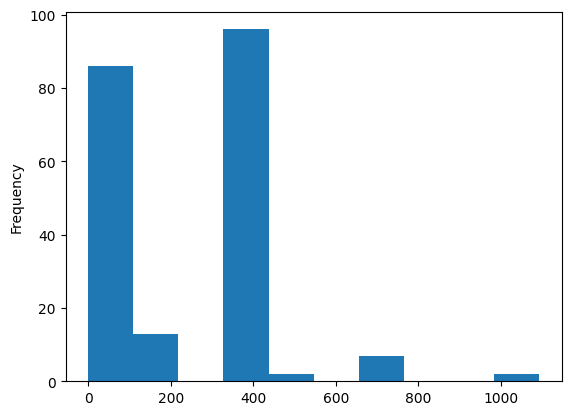

In [197]:
agg_subs["TotalCustomerLifetimeDays"].plot.hist()
plt.show()

15. Use your business knowledge (and math and stuff), to find a variable that is associated with `CustomerLifetimeDays`.
    * A. Show some numeric evidence that there's a meaningful relationship between your selected variable and `CustomerLifetimeDays`.
    * B. Create a plot that further proves there's a meaningful relationship between your variable and `CustomerLifetimeDays`.
    * C.  Interpret the relationship between CustomerLifetimeDays and your variable.

In [201]:
# Could be interesting...?
agg_subs["PricePerNewspaper"] = agg_subs["TotalNbrNewspapers"] / agg_subs["TotalPaid"]
agg_subs["PricePerDay"] = agg_subs["TotalCustomerLifetimeDays"] / agg_subs["TotalPaid"]

In [202]:
# A: Show some numeric evidence that there's a meaningful relationship
#    between your selected variable and `CustomerLifetimeDays`.
cor_matrix = agg_subs.corr(numeric_only=True)

cor_matrix = cor_matrix[["TotalCustomerLifetimeDays"]]
cor_matrix = cor_matrix.drop(index="TotalCustomerLifetimeDays")

cor_matrix = cor_matrix.sort_values("TotalCustomerLifetimeDays", ascending=False)

cor_matrix.style.background_gradient(cmap="YlOrRd")

,TotalCustomerLifetimeDays
TotalPaid,0.943963
TotalNbrNewspapers,0.916400
AvgSubscriptionPrice,0.742872
TotalNbrStart,0.382952
PricePerNewspaper,0.203696
ProductID,0.133826
PricePerDay,0.107315
CustomerID,-0.205920


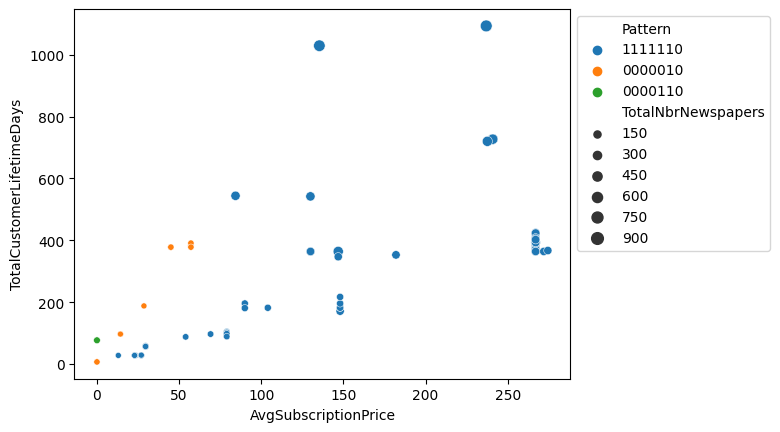

In [206]:
# B: Create a plot that further proves there's a meaningful relationship
#    between your variable and `CustomerLifetimeDays`.
ax = sns.scatterplot(
    data=agg_subs,
    x="AvgSubscriptionPrice",
    y="TotalCustomerLifetimeDays",
    hue="Pattern",
    size="TotalNbrNewspapers",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [21]:
# C: Interpret the relationship between CustomerLifetimeDays and your variable

# Jam packed plot.
#
# `AvgSubscriptionPrice` increases with `TotalCustomerLifetimeDays` and follows
# different rates within different patterns.
#
# There might not be much value to this relationship, might be redundant:
# "they paid us more for longer subscription and delivery Patterns cost differently".